In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,MaxPooling2D,Conv2D
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [11]:
classes = ['neutral', 'happy']
nb_classes = len(classes)
batch_size_for_data_generator = 20

base_dir = '/content/drive/MyDrive/JPHACKS21/SmileEstimation_Genki/GENKI-4K/sprit_data'

train_dir = base_dir+'/train'
valid_dir = base_dir+'/validation'

# 要調整
img_rows, img_cols = 180, 180

In [12]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(img_rows, img_cols),
                                                    color_mode='rgb',
                                                    classes=classes,
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    shuffle=True)

Found 3199 images belonging to 2 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_generator = test_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(img_rows, img_cols),
                                                   color_mode='rgb',
                                                   classes=classes,
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   shuffle=True)

Found 801 images belonging to 2 classes.


In [14]:
model=Sequential()
# 畳み込み層
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

# 全結合層
model.add(Flatten())
model.add(Dense(512,activation='relu'))
# 出力層
model.add(Dense(nb_classes,activation='softmax'))
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 128)      

In [15]:
opt = Adam(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer= opt, 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
history = model.fit(train_generator,
                    steps_per_epoch=99,
                    epochs=90,
                    validation_data=valid_generator,
                    validation_steps=25,
                    verbose=1)

Epoch 1/5
99/99 [==============================] - 1292s 13s/step - loss: 0.6974 - acc: 0.5336 - val_loss: 0.6788 - val_acc: 0.5650
Epoch 2/5
99/99 [==============================] - 233s 2s/step - loss: 0.6838 - acc: 0.5557 - val_loss: 0.6777 - val_acc: 0.5888
Epoch 3/5
99/99 [==============================] - 232s 2s/step - loss: 0.6817 - acc: 0.5652 - val_loss: 0.6768 - val_acc: 0.5725
Epoch 4/5
99/99 [==============================] - 232s 2s/step - loss: 0.6758 - acc: 0.5864 - val_loss: 0.6734 - val_acc: 0.6025
Epoch 5/5
99/99 [==============================] - 231s 2s/step - loss: 0.6732 - acc: 0.5985 - val_loss: 0.6748 - val_acc: 0.5925


In [17]:
hdf5_file = os.path.join(base_dir, 'smileEstimation_4000data.hdf5')
model.save(hdf5_file)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

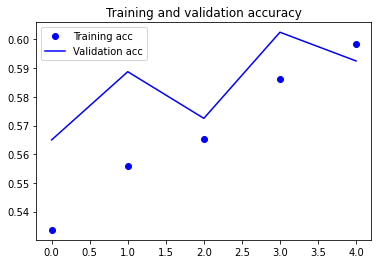

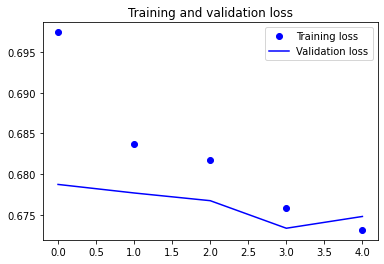

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()